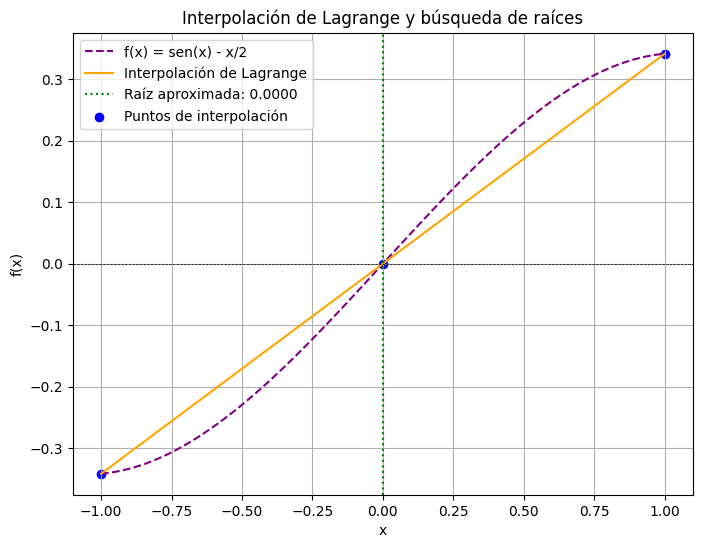

La raíz aproximada usando interpolación es: 0.0000
Errores en cada iteración del método de bisección:
Iteración	Error Absoluto	Error Relativo	Error Cuadrático
1	1.000000e+00	0.000000e+00	1.000000e+00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función que define la ecuación original
def f(x):
    return np.sin(x) - (x / 2)

# Interpolación de Lagrange para aproximar la función
def lagrange_interpolation(x, x_points, y_points):
    n = len(x_points)
    result = 0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

# Método de Bisección con cálculo de errores durante el proceso
def bisect(func, a, b, tol=1e-6, max_iter=100):
    if func(a) * func(b) > 0:
        raise ValueError("El intervalo no contiene una raíz")

    errores_abs = []
    errores_rel = []
    errores_cuad = []

    c_old = a  # Para calcular errores en la primera iteración
    for _ in range(max_iter):
        c = (a + b) / 2
        error_abs = abs(c - c_old)
        error_rel = error_abs / abs(c) if c != 0 else 0
        error_cuad = error_abs ** 2

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        if abs(func(c)) < tol or (b - a) / 2 < tol:
            return c, errores_abs, errores_rel, errores_cuad

        if func(a) * func(c) < 0:
            b = c
        else:
            a = c

        c_old = c

    return (a + b) / 2, errores_abs, errores_rel, errores_cuad

# Puntos seleccionados para la interpolación dentro del intervalo [-1, 1]
x0 = -1
x1 = 0
x2 = 1
x_points = np.array([x0, x1, x2])
y_points = f(x_points)

# Generación del polinomio interpolante
x_vals = np.linspace(x0, x2, 100)
y_interp = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]

# Encontrar la raíz usando el método de bisección sobre el polinomio interpolante
root, errores_abs, errores_rel, errores_cuad = bisect(lambda x: lagrange_interpolation(x, x_points, y_points), x0, x2)

# Gráfica con colores actualizados
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f(x_vals), label="f(x) = sen(x) - x/2", linestyle='dashed', color='purple')  # Color cambiado a púrpura
plt.plot(x_vals, y_interp, label="Interpolación de Lagrange", color='orange')  # Color cambiado a naranja
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(root, color='green', linestyle='dotted', label=f"Raíz aproximada: {root:.4f}")
plt.scatter(x_points, y_points, color='blue', label="Puntos de interpolación")  # Color cambiado a azul
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Interpolación de Lagrange y búsqueda de raíces")
plt.legend()
plt.grid(True)
plt.savefig("interpolacion_raices_colores.png")  # Guardar con nuevo nombre
plt.show()

# Imprimir la raíz encontrada
print(f"La raíz aproximada usando interpolación es: {root:.4f}")

# Mostrar los errores calculados
print("Errores en cada iteración del método de bisección:")
print("Iteración\tError Absoluto\tError Relativo\tError Cuadrático")
for i, (ea, er, ec) in enumerate(zip(errores_abs, errores_rel, errores_cuad)):
    print(f"{i+1}\t{ea:.6e}\t{er:.6e}\t{ec:.6e}")
